Data source: http://www.naturalearthdata.com/features/
- difficulty to use as online download
- not known how/where to put data, modify program to use the local data (maybe use esri/shape_loader)
- 

Ref: Example from http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#cartopy.feature.cartopy.feature.BORDERS

In [ ]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


Benefits for using Mercator:
- good for this EW > NS (this case)
- easy to plot labels
- cartopy support grid ticks of only cylindrical projection
- ref: http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

Disadvantages:
- straight meridians cause wrong sense of gloge
- not best with long NS short EW as the case is

Benefits of Transverse Mercator
- better when NS extents is longer
- ASEAN has 2 times longer above equator than below (20S to 40N)
- and main area is centered away from equator

Disadvantages
- software implementation has some limitations
- label ticks cant be generated easily

In [21]:
import cartopy   # v 0.14
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# TransverseMercator central_longitude=115, others=defaults; see help below
# good due to symmetry N/S, central_longitude=115
class ASEAN3(ccrs.Mercator):
    """
    Mercator projection for ASEAN domain.
    Ellipsoid is wgs84 (default)

    """
    def __init__(self):
        globe = ccrs.Globe()  # default globe: wgs1984
        super(ASEAN3, self).__init__(central_longitude=115, globe=globe)

    @property
    def x_limits(self):
        return (-2.9e6, 3.0e6)

    @property
    def y_limits(self):
        return (-1.5e6, 3.7e6)

# To set the extents of the map based on a bounding box, in any coordinate system, use the set_extent() method.
# The above uses x_limits() y_limits() which requires values in meters on UTM.

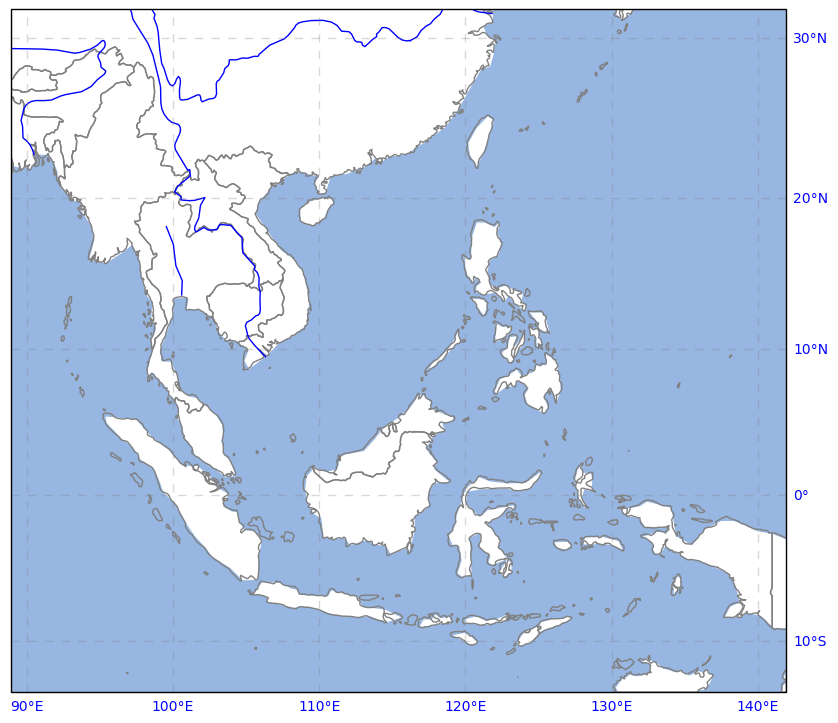

In [48]:
# TODO: use flags
# - to switch layers ON/OFF
# - to set colors individually

import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

plt.figure(figsize=(10, 12))

ax = plt.axes( projection=ASEAN3() )   # make use of ASEAN proj

# Needs admin level 0-1 (countries, provinces)

# These form of code  -- dont work well
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
#states_provinces = cfeature.NaturalEarthFeature(
#        category='cultural',
#        name='admin_1_states_provinces_lines',
#        scale='50m',
#        facecolor='none')
#ax.add_feature(states_provinces, edgecolor='gray')
# ***Not available***

# Create a feature for Admin 0
#admin_x = cfeature.NaturalEarthFeature(
#        category='cultural',
#        name='ne_50m_admin_1_states_provinces_lines_shp',
#        scale='50m',
#        facecolor='none')

# Tried: and not worked
# - 110m_admin_1_states_provinces_lines
# - ne_10m_admin_0_boundary_lines_land
# - ne_50m_admin_1_states_provinces_lines_shp
# ax.add_feature(admin_x, edgecolor='gray')

# This is the correct methods:
ax.add_feature(cfeature.OCEAN, facecolor=cfeature.COLORS['water'])  # physical/110m_ocean.shp downloaded by this

# ref: http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#cartopy.feature.cartopy.feature.BORDERS
# physical/50m_land.shp
# status: OK
#land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
#                                        edgecolor='face',
#                                        facecolor=cfeature.COLORS['land'])
#ax.add_feature(land_50m, edgecolor='gray')

# ---file NOT found!---: /naturalearth/50m/physical/ne_50m_rivers.zip **BAD**
# YOU can create it ??
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers', '50m',
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['water'])
# ax.add_feature(rivers_50m, edgecolor='green')

# country boundaries at medium scale
# status: OK, it is polygon features
admin0_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m',
                                        edgecolor='green',
                                        facecolor='none')
ax.add_feature(admin0_50m, edgecolor='gray')

#ax.add_feature(cfeature.LAKES, edgecolor='blue')  # 110m_lakes.shp is downloaded by this/ no feature in there
ax.add_feature(cfeature.RIVERS, edgecolor='blue', facecolor='none')  # 110m_rivers_lake_centerlines downloaded by this
#ax.add_feature(cfeature.BORDERS, edgecolor='brown') # 110m_admin_0_bound, crude

# files downloaded: features wanted not exist, no provinces bounds
#admin1_50m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '50m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin1_50m)

# Note it has ne_ prefix when '10m' is used to access datd
# Status OK: show province boundaries, excluding (coast lines, country bounds, lakes)
#admin1_10m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '10m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin1_10m)

# cultural/50m_admin_1_states_provinces_lines.zip (no ne_ prefix)
# ---file NOT found!---
#admin0_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_states_provinces_lines', '50m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin0_50m)

# ---file NOT found!--- CAN I Create it?
#admin2_10m = cfeature.NaturalEarthFeature('cultural', 'admin_2_states_provinces_lines', '10m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin2_10m)


# ax.coastlines() is good!
# Ref: coastlines(resolution='110m', color='black', **kwargs)

# how about admin  -- no shortcut function like .coastlines, use 'cfeature' as above
# ax.coastlines(resolution='10m')  # 50m not perfect/ 10m is too detailed
# 10m was downloaded to .local/share/cartopy/shapefiles/natural_earth/physical
# files: physical/10m_coastline.shp (dbf, shp, shx)

road_10m_f = False
if road_10m_f:
    roads_10m = cfeature.NaturalEarthFeature('cultural', 'roads', '10m',
                                     edgecolor='red',
                                     facecolor='none')  #custom color, how to set alpha color = 'none'
    ax.add_feature(roads_10m)  # has style to draw as above

#ax.tissot(rad_km=200000.0, lons=lons, lats=lats, n_samples=40, facecolor='orange', alpha=0.4)  # OK

#gl = ax.gridlines(draw_labels=False, \
#             xlocs=[80,90,100,110,120,130,140,150], \
#             ylocs=[-20,-10,0,10,20,30,40], crs=ccrs.Geodetic())  # parrallels/meridians

# This works
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.4, linestyle='--')

# TypeError: Cannot label Mercator gridlines. Only PlateCarree gridlines are currently supported.
#gl = ax.gridlines(crs=ccrs.Mercator(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.4, linestyle='--')

gl = ax.gridlines(draw_labels=True,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([80,90,100,110,120,130,140,150])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10,20,30,40])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'blue', 'weight': 'normal'}
gl.ylabel_style = {'size': 10, 'color': 'blue', 'weight': 'normal'}

# ticks -- error: Cannot handle non-rectangular coordinate systems.
#ax.set_xticks([80,90,100,110,120,130,140,150], minor=False, crs=ccrs.Geodetic())

plt.show()

Using Mercator:
- parallels seem equally spaced, thus, similar to simple Plate-carree
- all meridians are straight lines, thus, easy to locate
- straight meridians do not give impression of map representing globe/earth surface

## Using Local Shape Files

In [ ]:
# Tried, success
# Shall we copy files to this place
from cartopy.io import shapereader
ne_shp = shapereader.Reader('shape_files/ne_10m_admin_0_boundary_lines_land.shp')
ax = plt.axes(projection=ccrs.PlateCarree())  # what is best projection ?
ax.set_extent([95, 110, 0, 25])  # Thailand
#ax.add_feature(ne_shp.geometries())  # geometry / record see help down below..
ax.add_geometries(ne_shp.geometries(), ccrs.Geodetic(), facecolor='none')

In [ ]:
plt.show()

In [ ]:
help(ax.add_feature)

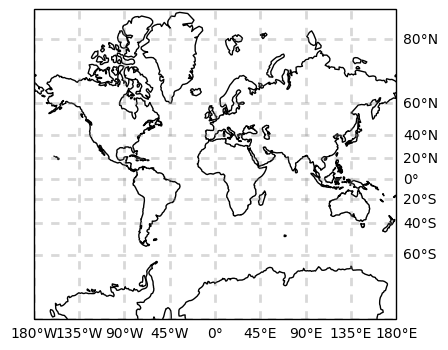

In [46]:
# This proves that using "crs=ccrs.PlateCarree()" is OK

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl = ax.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.3, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180,-135, -90, -45, 0, 45, 90, 135, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.xlabel_style = {'weight': 'normal'}

plt.show()

## TODO

- ax.annotate: can be used to add text on map, http://matplotlib.org/users/annotations_intro.html
- to get coordinates, one can read from cursor position on map (x,y)
- if use (lat, long), may need coord tranformation

---

In [110]:
class F(object):
    def __init__(self, x=0):
        self.x = x
        self._x = 741
    def setx(self, x):
        self.x = x
    def getx(self):
        return self.x

In [111]:
ff=F(x=425)

In [112]:
ff.x = 34.5

In [113]:
ff.getx()

34.5

In [114]:
ff.setx(104560)

In [115]:
ff.x

104560

741